In [ ]:
#importacion de datos y librerias
import pandas as pd

peliculas = pd.read_csv("movies.csv")
peliculas.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
peliculas.columns = ['peliculaId', 'titulo', 'generos']
peliculas = peliculas.set_index('peliculaId')
peliculas.head()

,titulo,generos
peliculaId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [ ]:
peliculas.describe()

,titulo,generos
count,9742,9742
unique,9737,951
top,Emma (1996),Drama
freq,2,1053


In [ ]:
#Importamos el archivo ratings
notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
#Renombrar columnas
notas.columns = ['usuariosId', 'peliculaId', 'nota', 'momento']
notas.head()

,usuariosId,peliculaId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas.describe()

,usuariosId,peliculaId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Primer intento de un sistema de recomendación

In [ ]:
#Frecuencia de las notas vistas
notas.value_counts('peliculaId')

peliculaId
356       329
318       317
296       307
593       279
2571      278
         ... 
4093        1
4089        1
58351       1
4083        1
193609      1
Name: count, Length: 9724, dtype: int64

In [ ]:
peliculas.loc[356]

titulo          Forrest Gump (1994)
generos    Comedy|Drama|Romance|War
Name: 356, dtype: object

In [ ]:
total_de_votos = notas.value_counts("peliculaId")

In [ ]:
peliculas['total_de_votos'] = total_de_votos
peliculas.head(5)

,titulo,generos,total_de_votos
peliculaId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0


In [ ]:
peliculas.sort_values('total_de_votos', ascending = False).head(10)

,titulo,generos,total_de_votos
peliculaId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0
110,Braveheart (1995),Action|Drama|War,237.0
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0


Segundo intento SR

In [ ]:
notas.groupby('peliculaId').mean()['nota']

peliculaId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [ ]:
peliculas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9742 entries, 1 to 193609
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   titulo          9742 non-null   object 
 1   generos         9742 non-null   object 
 2   total_de_votos  9724 non-null   float64
dtypes: float64(1), object(2)
memory usage: 562.5+ KB


In [ ]:
#Guardar promedio de notas para cada peliculaId

media_votos = notas.groupby('peliculaId').mean()['nota']
media_votos.head()

peliculaId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [ ]:
peliculas['media_votos'] = media_votos
peliculas.head()

,titulo,generos,total_de_votos,media_votos
peliculaId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143
5,Father of the Bride Part II (1995),Comedy,49.0,3.071429


In [ ]:
#Ordenamiento considerando la variable total de votos

peliculas.sort_values('total_de_votos', ascending = False).head()

,titulo,generos,total_de_votos,media_votos
peliculaId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446


In [ ]:
#Ordenamiento considerando la media de votos
peliculas.sort_values('media_votos', ascending=False).head()


,titulo,generos,total_de_votos,media_votos
peliculaId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0


In [ ]:
#Filtrado, nos vamos a quedar con aquellas películas cuyo total de votos sea >=10

peliculas.query('total_de_votos >=10').sort_values('media_votos', ascending = False).head(10)

,titulo,generos,total_de_votos,media_votos
peliculaId,,,,
1041,Secrets & Lies (1996),Drama,11.0,4.590909
3451,Guess Who's Coming to Dinner (1967),Drama,11.0,4.545455
1178,Paths of Glory (1957),Drama|War,12.0,4.541667
1104,"Streetcar Named Desire, A (1951)",Drama,20.0,4.475000
2360,"Celebration, The (Festen) (1998)",Drama,12.0,4.458333
1217,Ran (1985),Drama|War,15.0,4.433333
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
951,His Girl Friday (1940),Comedy|Romance,14.0,4.392857
1927,All Quiet on the Western Front (1930),Action|Drama|War,10.0,4.350000


In [ ]:
#Filtrado, nos vamos a quedar con aquellas películas cuyo total de votos sea >=50

peliculas.query('total_de_votos >=50').sort_values('media_votos', ascending = False).head(10)

,titulo,generos,total_de_votos,media_votos
peliculaId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


In [ ]:
peliculas_mas_50 = peliculas.query('total_de_votos >=50')
peliculas_mas_50.head()

,titulo,generos,total_de_votos,media_votos
peliculaId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
6,Heat (1995),Action|Crime|Thriller,102.0,3.946078
7,Sabrina (1995),Comedy|Romance,54.0,3.185185


In [ ]:
peliculas_mas_50.sort_values('media_votos', ascending = False).head(10)

,titulo,generos,total_de_votos,media_votos
peliculaId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


Tercer intento de un SR - considerar gustos usuario

In [ ]:
peliculas_vistas_por_mi = [ 1, 19, 21, 10, 2] #id de peliculas

In [ ]:
peliculas.loc[peliculas_vistas_por_mi]

,titulo,generos,total_de_votos,media_votos
peliculaId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [ ]:
#Obtener las peliculas del genero: Adventure|Children|Fantasy

peliculas.query("generos =='Adventure|Children|Fantasy'")

,titulo,generos,total_de_votos,media_votos
peliculaId,,,,
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy,34.0,3.235294
126,"NeverEnding Story III, The (1994)",Adventure|Children|Fantasy,7.0,2.000000
1009,Escape to Witch Mountain (1975),Adventure|Children|Fantasy,9.0,3.055556
2043,Darby O'Gill and the Little People (1959),Adventure|Children|Fantasy,4.0,2.750000
2093,Return to Oz (1985),Adventure|Children|Fantasy,6.0,3.000000
2161,"NeverEnding Story, The (1984)",Adventure|Children|Fantasy,43.0,3.581395
2162,"NeverEnding Story II: The Next Chapter, The (1...",Adventure|Children|Fantasy,8.0,2.500000
2399,Santa Claus: The Movie (1985),Adventure|Children|Fantasy,4.0,2.250000


In [ ]:
peliculas_mas_50.query("generos == 'Adventure|Children|Fantasy'")

,titulo,generos,total_de_votos,media_votos
peliculaId,,,,
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548


In [ ]:
aventura_infantil_fantasia = peliculas_mas_50.query("generos == 'Adventure|Children|Fantasy'")
aventura_infantil_fantasia.head()

,titulo,generos,total_de_votos,media_votos
peliculaId,,,,
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548


In [ ]:
#Ordenamiento por la media de votos

aventura_infantil_fantasia.sort_values('media_votos', ascending = False).head()

,titulo,generos,total_de_votos,media_votos
peliculaId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [ ]:
#Eliminar peliculas vistas por el usuario

aventura_infantil_fantasia.drop(peliculas_vistas_por_mi, errors ='ignore').sort_values('media_votos', ascending = False).head()

,titulo,generos,total_de_votos,media_votos
peliculaId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548


Ejercicio Sprint:
Realizar una recomendación utilizando nuestro objeto pdf: peliculas_con_mas_50_votos pero ahora considerando el género correspondiente a la última película vista por el usuario Juan.

Los ID de las películas a utilizar son los siguientes: [2,10, 296,2130,4]

In [ ]:
peliculas_Juan = [2,10, 296,2130,4]

In [ ]:
peliculas.loc[peliculas_Juan]

,titulo,generos,total_de_votos,media_votos
peliculaId,,,,
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
2130,Atlantic City (1980),Crime|Drama|Romance,8.0,3.687500
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143


In [ ]:
#Obtener las peliculas del genero: Comedy|Crime|Drama|Thriller

peliculas.query("generos == 'Comedy|Drama|Romance'")

,titulo,generos,total_de_votos,media_votos
peliculaId,,,,
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143
11,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
52,Mighty Aphrodite (1995),Comedy|Drama|Romance,28.0,3.464286
58,"Postman, The (Postino, Il) (1994)",Comedy|Drama|Romance,37.0,4.027027
94,Beautiful Girls (1996),Comedy|Drama|Romance,10.0,3.950000
...,...,...,...,...
159193,Café Society (2016),Comedy|Drama|Romance,1.0,3.000000
159415,Swiss Army Man (2016),Comedy|Drama|Romance,2.0,3.250000
164909,La La Land (2016),Comedy|Drama|Romance,9.0,3.388889


In [ ]:
peliculas_mas_50.query("generos == 'Comedy|Drama|Romance'")

,titulo,generos,total_de_votos,media_votos
peliculaId,,,,
11,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
539,Sleepless in Seattle (1993),Comedy|Drama|Romance,106.0,3.471698
1247,"Graduate, The (1967)",Comedy|Drama|Romance,79.0,4.063291
1639,Chasing Amy (1997),Comedy|Drama|Romance,52.0,3.576923
1784,As Good as It Gets (1997),Comedy|Drama|Romance,96.0,3.697917
2396,Shakespeare in Love (1998),Comedy|Drama|Romance,92.0,3.777174
3481,High Fidelity (2000),Comedy|Drama|Romance,75.0,3.666667
4246,Bridget Jones's Diary (2001),Comedy|Drama|Romance,65.0,3.623077
6711,Lost in Translation (2003),Comedy|Drama|Romance,74.0,4.033784


In [ ]:
Comedia_drama_romance = peliculas_mas_50.query("generos == 'Comedy|Drama|Romance'")
Comedia_drama_romance.head()

,titulo,generos,total_de_votos,media_votos
peliculaId,,,,
11,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
539,Sleepless in Seattle (1993),Comedy|Drama|Romance,106.0,3.471698
1247,"Graduate, The (1967)",Comedy|Drama|Romance,79.0,4.063291
1639,Chasing Amy (1997),Comedy|Drama|Romance,52.0,3.576923
1784,As Good as It Gets (1997),Comedy|Drama|Romance,96.0,3.697917


Recomendación al usuario Juan según las puntuaciones y género de la última película visualizada

In [ ]:
Comedia_drama_romance.drop(peliculas_Juan, errors ='ignore').sort_values('media_votos', ascending = False).head()

,titulo,generos,total_de_votos,media_votos
peliculaId,,,,
1247,"Graduate, The (1967)",Comedy|Drama|Romance,79.0,4.063291
6711,Lost in Translation (2003),Comedy|Drama|Romance,74.0,4.033784
6942,Love Actually (2003),Comedy|Drama|Romance,59.0,3.788136
2396,Shakespeare in Love (1998),Comedy|Drama|Romance,92.0,3.777174
56367,Juno (2007),Comedy|Drama|Romance,65.0,3.769231


Sprint 2


In [ ]:
#Ranking

#Juan - 5
#Christian - 4
#Sergio - 3.5

# Distancia Juan - Christian -> 5 - 4 = 1
# Distancia Christian Sergio -> 4 - 3.5 = 0.5

# Analizando una única película


In [ ]:
# Juan - [5, 5]
# Sergio - [4, 4.5]

Text(0.5, 1.0, 'Cálculo de distancias entre Usuarios')

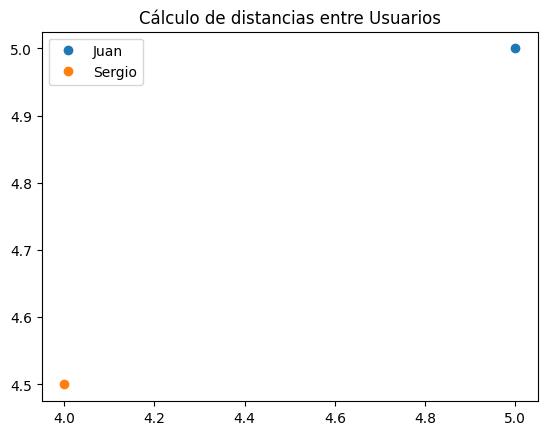

In [ ]:
#Plano cartesiano

import matplotlib.pyplot as plt

plt.plot(5, 5, "o")
plt.plot(4, 4.5, "o")
plt.legend(["Juan", "Sergio"])
plt.title("Cálculo de distancias entre Usuarios")

Text(0.5, 1.0, 'Cálculo de distancias entre Usuarios')

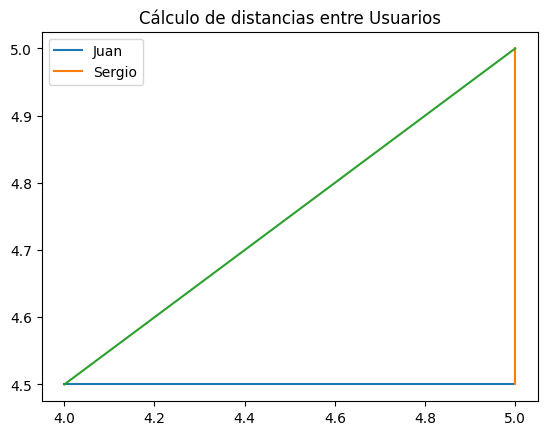

In [ ]:
plt.plot([4, 5], [4.5, 4.5], linestyle= "-")
plt.plot([5, 5], [4.5, 5], linestyle = "-")
plt.plot([4, 5], [4.5, 5], linestyle = "-")
plt.legend(["Juan", "Sergio"])
plt.title("Cálculo de distancias entre Usuarios")

In [ ]:
import numpy as np
juan = np.array([5, 5])
sergio = np.array([4, 4.5])

juan - sergio

array([1. , 0.5])

In [ ]:
#Pitagoras

from math import sqrt

def pitagoras (a, b):
  (delta_x, delta_y)= a - b
  return sqrt(delta_x*delta_x + delta_y*delta_y)

In [ ]:
#Invocar funcion pitagoras

pitagoras(juan, sergio)

1.118033988749895

In [ ]:
emiliano = np.array([6, 8])
pilar = np.array([3, 5])

In [ ]:
pitagoras(emiliano, pilar)

4.242640687119285

In [ ]:
np.linalg.norm(juan-sergio)


1.118033988749895

In [ ]:
def distancia(a, b):
  return np.linalg.norm(a-b)

In [ ]:
distancia(juan, sergio)

1.118033988749895

Text(0.5, 1.0, 'Cálculo de distancias entre Usuarios')

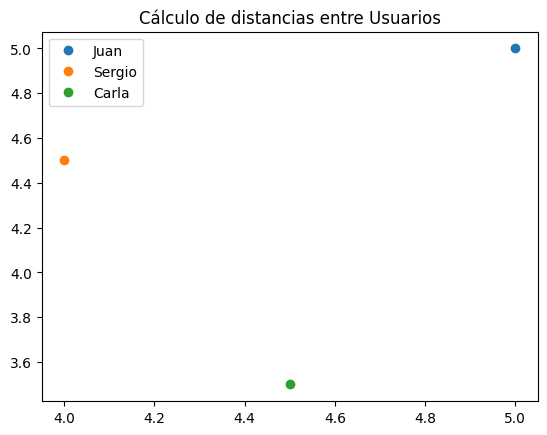

In [ ]:
#Nuevo escenario añadimos a Carla


plt.plot(5, 5, "o")
plt.plot(4, 4.5, "o")
plt.plot(4.5, 3.5, "o")
plt.legend(["Juan", "Sergio", "Carla"])
plt.title("Cálculo de distancias entre Usuarios")

In [ ]:
juan = np.array([5, 5, 4.5])
sergio = np.array([4, 4.5, 5])
carla = np.array([4.5, 3.5, 5])

In [ ]:
#Calculamos distancias entre los puntos
print(distancia(juan, sergio))
print(distancia(sergio, carla))
print(distancia(carla, juan))

1.224744871391589
1.118033988749895
1.6583123951777


Generalizando el calculo de distancias

In [ ]:
notas.head()


,usuariosId,peliculaId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
#Visualizaciones usuarioID 1
notas.query("usuariosId==1")

,usuariosId,peliculaId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
227,1,3744,4.0,964980694
228,1,3793,5.0,964981855
229,1,3809,4.0,964981220
230,1,4006,4.0,964982903


In [ ]:
#Peliculas vistas por usuario 4
notas.query("usuariosId==4")

,usuariosId,peliculaId,nota,momento
300,4,21,3.0,986935199
301,4,32,2.0,945173447
302,4,45,3.0,986935047
303,4,47,2.0,945173425
304,4,52,3.0,964622786
...,...,...,...,...
511,4,4765,5.0,1007569445
512,4,4881,3.0,1007569445
513,4,4896,4.0,1007574532
514,4,4902,4.0,1007569465


In [ ]:
#Almacenamos en variables
usuario4=notas.query("usuariosId==4")[['peliculaId','nota']].set_index('peliculaId')
usuario1=notas.query("usuariosId==1")[['peliculaId','nota']].set_index('peliculaId')

In [ ]:
#Id de pelicula visualizada junto con la nota
usuario4

,nota
peliculaId,
21,3.0
32,2.0
45,3.0
47,2.0
52,3.0
...,...
4765,5.0
4881,3.0
4896,4.0


In [ ]:
diferencias = usuario1.join(usuario4, lsuffix='_izq', rsuffix= '_der').dropna()

In [ ]:
diferencias['nota_izq']

peliculaId
47      5.0
235     4.0
260     5.0
296     3.0
441     4.0
457     5.0
553     5.0
593     4.0
608     5.0
648     3.0
919     5.0
1025    5.0
1060    4.0
1073    5.0
1080    5.0
1136    5.0
1196    5.0
1197    5.0
1198    5.0
1213    5.0
1219    2.0
1265    4.0
1282    5.0
1291    5.0
1500    4.0
1517    5.0
1580    3.0
1617    5.0
1732    5.0
1967    4.0
2078    5.0
2174    4.0
2395    5.0
2406    4.0
2571    5.0
2628    4.0
2692    5.0
2858    5.0
2959    5.0
2997    4.0
3033    5.0
3176    1.0
3386    5.0
3489    4.0
3809    4.0
Name: nota_izq, dtype: float64

In [ ]:
#Distancia entre usuarios, mediante cada una de las columnas
distancia(diferencias['nota_izq'], diferencias['nota_der'])

11.135528725660043

Creando funciones para el cálculo de distancias

In [ ]:
#Funcion para obtener nota de un usuario x
def notas_del_usuario(usuariosId):
  notas_del_usuario = notas.query("usuariosId==%d" % usuariosId)[['peliculaId', 'nota']]
  notas_del_usuario = notas_del_usuario.set_index('peliculaId')
  return notas_del_usuario

In [ ]:
#Comprobamos que la funcion da la respuesta esperada
notas_del_usuario(1)

,nota
peliculaId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0
...,...
3744,4.0
3793,5.0
3809,4.0


In [ ]:
#Mediante funcion de numpy

def diferencia_de_vectores(a, b):
  return np.linalg.norm(a-b)

In [ ]:
#Definir funcion que me devuelva la distancia entre cualquier usuario
def distancia_entre_usuarios(usuario_Id1, usuario_Id2):
  notas1 = notas_del_usuario(usuario_Id1)
  notas2 = notas_del_usuario(usuario_Id2)
  diferencias = notas1.join(notas2, lsuffix='_izq', rsuffix='_der').dropna()
  return diferencia_de_vectores(diferencias['nota_izq'], diferencias['nota_der'])

In [ ]:
distancia_entre_usuarios(1, 4)

11.135528725660043

In [ ]:
distancia_entre_usuarios(3, 5)

4.5

Usuarios más próximos entre todos los usuarios

In [ ]:
notas.head()

,usuariosId,peliculaId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
#Cuantos valores únicos de usuarios hay?
len(notas['usuariosId'].unique())

610

In [ ]:
#Ampliamos la funcion para el cálculo que buscamos

def distancia_entre_usuarios(usuario_Id1, usuario_Id2):
  notas1 = notas_del_usuario(usuario_Id1)
  notas2 = notas_del_usuario(usuario_Id2)
  diferencias = notas1.join(notas2, lsuffix='_izq', rsuffix='_der').dropna()
  distancias = diferencia_de_vectores(diferencias['nota_izq'], diferencias['nota_der'])
  return [usuario_Id1, usuario_Id2, distancias]

In [ ]:
#Calcular la distancia entre un usuario ref y el resto

usuarios = notas['usuariosId'].unique()
usuarios_ref = 1

#Definimos bucle iterativo
for usuario in usuarios:
  informaciones =  distancia_entre_usuarios(usuarios_ref, usuario)
  print(informaciones)

In [ ]:
def distancia_de_todos(usuario_ref):
  usuarios = notas['usuariosId'].unique() #Valores únicos usuarios
  distancias = []

  for usuario in usuarios:
    informaciones = distancia_entre_usuarios(usuario_ref, usuario)
    distancias.append(informaciones)

  distancias = pd.DataFrame(distancias, columns = ['usuario_ref', 'usuario', 'distancia'])
  return distancias

In [ ]:
distancia_de_todos(1).head()

,usuario_ref,usuario,distancia
0,1,1,0.000000
1,1,2,1.414214
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


In [ ]:
#Refinando el cálculo
distancia_de_todos(1).sort_values('distancia').head(10)

,usuario_ref,usuario,distancia
0,1,1,0.0
577,1,578,0.0
76,1,77,0.0
84,1,85,0.0
174,1,175,0.0
555,1,556,0.0
252,1,253,0.0
290,1,291,0.0
305,1,306,0.0
495,1,496,0.0


In [ ]:
def distancia_entre_usuarios(usuario_Id1, usuario_Id2, minimo = 5):
  notas1 = notas_del_usuario(usuario_Id1)
  notas2 = notas_del_usuario(usuario_Id2)
  diferencias = notas1.join(notas2, lsuffix='_izq', rsuffix='_der').dropna()
  if len(diferencias)<minimo:
    return['usuario_Id1', 'usuario_Id2', 10000] #Muy diferentes entre si
  distancias = diferencia_de_vectores(diferencias['nota_izq'], diferencias['nota_der'])
  return [usuario_Id1, usuario_Id2, distancias]

In [ ]:
distancia_de_todos(1).sort_values('distancia').head(20)

,usuario_ref,usuario,distancia
0,1,1,0.000000
76,1,77,0.000000
510,1,511,0.500000
365,1,366,0.707107
522,1,523,1.000000
48,1,49,1.000000
8,1,9,1.000000
257,1,258,1.000000
318,1,319,1.118034
397,1,398,1.224745


Resolución Sprint 3
Ejercicio 1: Pilar trabaja en una empresa inmobiliaria y está realizando un análisis para calcular la distancia entre departamentos y casas que tiene a la venta en un determinado barrio. Para su análisis está usando Python y ya construyó los arrays Nunpy con la ubicación de los inmuebles:

In [ ]:
import numpy as np

departamento1132 = np.array([1, 4])
departamento2859 = np.array([3, 4.5])
casa5687 = np.array([3, 4.5])
casa6295 = np.array([5, 2.5])


In [ ]:

#Esta opción genera la función de pitágoras para dos variables bidimensionales (pelicula y puntuación para el usuario a y el usuario b) y donde los catetos son la distancia entre puntos del usuario a y el usuario b
#a - b es esa distancia por lo que esta opción es la correcta.
from math import sqrt

def pitagoras(a, b):
  (delta_x, delta_y) = a - b
  return sqrt(delta_x*delta_x + delta_y*delta_y)


In [ ]:
pitagoras(departamento1132, departamento2859)

2.0615528128088303

In [ ]:
pitagoras(departamento1132, casa5687)

2.0615528128088303

In [ ]:
pitagoras(casa6295, casa5687)

2.8284271247461903